In [1]:
# Simply run the cell below and import the dataset

import pandas as pd
import matplotlib.pyplot as plt
apple = pd.read_csv("aapl.csv")
apple['Date'] = pd.to_datetime(apple['Date'])
apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-11,10.526428,10.615714,10.521428,10.548572,9.115436,427753200
1,2010-10-12,10.550357,10.696428,10.446072,10.662143,9.213575,558544000
2,2010-10-13,10.721429,10.784286,10.707143,10.719286,9.262955,630092400
3,2010-10-14,10.774643,10.802500,10.728572,10.796785,9.329926,435296400
4,2010-10-15,10.980000,11.250000,10.889643,11.240714,9.713540,922194000
...,...,...,...,...,...,...,...
2513,2020-10-05,113.910004,116.650002,113.550003,116.500000,116.500000,106243800
2514,2020-10-06,115.699997,116.120003,112.250000,113.160004,113.160004,161498200
2515,2020-10-07,114.620003,115.550003,114.129997,115.080002,115.080002,96849000
2516,2020-10-08,116.250000,116.400002,114.589996,114.970001,114.970001,83477200


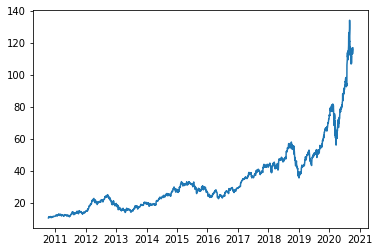

In [2]:
plt.plot(apple['Date'], apple['Close'])

Let Moving Average to be defined as below:

$MA_n = \frac{1}{n}\sum_{i=1}^{n}X_i$,

where n is the number of observations in the time frame to be averaged, and X is the observation in the dataset.

Based on this equation, complete  the `movAvg` function below.

For your reference, please read [this page](https://www.investopedia.com/terms/m/movingaverage.asp) for better understanding of moving average.

In [4]:
# movAvg takes 'l', which is pandas Series, and 'n', an integer, as two parameters.
# Returns: A moving averaged list of 'l'
# For index < n - 1, l[index] = average from l[0] to l[index]
# Else, l[index] = average from l[index - n + 1] to l[index]
# Note that for colon operator, end is non-inclusive! 
# TODO: Make the cell print 'True' for all test cases

# Your code goes below here!
def movAvg(l: pd.Series, n: int) -> list:
    # l.iloc[i] >> l[i]
    # pd dataframe(Series) is more computation heavy than list (O(n) vs O(1))
    
    l = l.to_list()
    ret =[]
    for i in range(len(l)):
        if i < n - 1:
            ret.append(sum(l[:i + 1])/len(l[:i + 1]))
        else:
            ret.append(sum(l[i - n + 1 : i + 1])/len(l[i - n + 1 : i + 1]))
    return ret















# Do not modify below!
ret = movAvg(apple['Close'], 7)
print(ret[5] == sum(apple['Close'].iloc[:6])/6)
print(ret[7] == apple['Close'].rolling(7).mean().iloc[7])

True
True


In [7]:
# Using the 'movAvg' written above, create a 30-days moving averaged data of apple['Close']
# Based on the returned data, create a new column in apple titled 'CloseMovAvg'
# TODO: Make the cell print 'True' for all test cases

# Your code goes below here!

mov_avg_close = movAvg(apple['Close'], 30)
len(apple['Close']) == len(mov_avg_close)

apple['CloseMovAvg'] = mov_avg_close






# Do not modify below!
print(round(apple['CloseMovAvg'].iloc[100], 5) == round(apple['Close'].rolling(30).mean().iloc[100], 5))

True


In [8]:
# If you have not installed 'ipympl' before, this cell will restart your kernel.
# If so, please restart the kernel and run all the cells above again.

try:
    import ipympl
except:
    !pip install ipympl
    try:
        !pip3 install ipympl
    except: pass
    import os
    os._exit(00)

In [10]:
# Set the figsize as (10, 5)
# Create a plot with x = 'Date' and y = 'CloseMovAvg', and label it as 'MovAvg'
# Create a plot with x = 'Date' and y = 'Close', and label it as 'Close'
# Set x label, y label and title of the graph accordingly
# Show legend
# TODO: Create a grapth with two plots and axes, graph titles
%matplotlib widget

# Your code goes below here!


plt.figure(figsize = (10, 5))
plt.plot(apple['Date'], apple['Close'], label = 'Close')
plt.plot(apple['Date'], apple['CloseMovAvg'], label = 'MovAvg')
plt.legend()







Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
# Create a function that takes two pandas Series, 'date' and 'data', as inputs
# And returns a dictionary thats keys are months and values are average data for each months
# for 'date' and 'data', same index refers to the data from the same date
# i.e. if date.iloc[0] is 2000-01-01, data.iloc[0] is the data in 2000-01-01
# TODO: Make the cell print 'True' for all test cases
# Hint: to retrieve a month from pd.Timestamp object, use '.month'
# i.e. apple['Date'].iloc[0].month returns 10

# Your code goes below here!
def monthAvgDict(date: pd.Series, data: pd.Series) -> dict:
    date = date.to_list()
    data = data.to_list()
    date = [i.month for i in date]
    ret = {}
    for i in range(len(date)):
        if date[i] not in ret:
            ret.update({date[i]:[]})
        ret[date[i]].append(data[i])
    ret = {i: sum(ret[i])/len(ret[i]) for i in ret}
    return ret










# Do not modify below!
print(monthAvgDict(pd.Series([pd.Timestamp(2000, 1, 1) if i % 2 == 0 else pd.Timestamp(2000, 2, 1) for i in range(10)]), pd.Series([i for i in range(1,11)]))[1] == 5)
print(len(monthAvgDict(apple['Date'], apple['Close'])) == 12)


True
True


Now, based on the `monthAvgDict` we have created above, lets observe how the average stock price of Apple differ by month.

Based on the data returned from `monthAvgDict`, we will create a bar chart.

To read more about the bar chart in matplotlib, please refer to [this page](https://pythonbasics.org/matplotlib-bar-chart/).

In [22]:
# pass 'apple['Date']' and 'apple['Close'] to 'monthAvgDict' created above, 
# and create two lists, 'month' and 'avg_close' based on the returned dictionary
# Using two lists, graph a bar plot of the average closing price of Apple by month.
# Set the figsize as (10, 5)
# Set x label, y label and title of the graph accordingly
# TODO: Create a bar plot with axes, graph titles

# Your code goes below here!


month_avg_dict = monthAvgDict(apple['Date'], apple['Close'])
month = list(month_avg_dict.keys())
avg_close = list(month_avg_dict.values())

plt.figure(figsize = (10, 5))
plt.bar(month, avg_close)

print(month)






Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9]
